#  This Notebook will give info related to NSEPy and it's function


### NSEPy is library used for connection to NSE site and fetch data related to stocks which contains Historical data, options data , furtures data , etc.

### Note : NSE website strickly says web-scrapping is not allowed on there website. So, not sure about using this library is aslo safe option or not.

In [1]:
# Installation of NSEPy

!pip install nsepy

<AxesSubplot:xlabel='Date'>

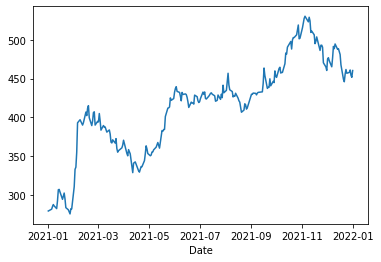

In [22]:
# Most used funtion from NSEPy is get_history

from nsepy import get_history
from datetime import date

data = get_history(symbol='SBIN',
                   start=date(2021,1,1) , 
                   end = date(2022,1,1))
data.columns
data['Close'].plot()


In [37]:
# Get futures data 
# Remember here we must have some domain knowledge to execute this.
# Every Thursday we have closure of weekly options and every friday new cycle will start for new options trading for Nifty50 and 
#     Nifty-Bank
# Every Other stocks having cycle of closure of last thursday of month , in case of holiday non-holiday day before thurday.

data=get_history(symbol='SBIN' ,
                 start=date(2022,1,7) ,
                 end=date(2022,1,15) , 
                 futures=True , 
                 expiry_date=date(2022,1,27))
data.head()


,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,
2022-01-07,SBIN,2022-01-27,493.75,503.45,490.45,493.4,493.00,493.4,20052,1.494898e+10,90403500,310500,491.25
2022-01-10,SBIN,2022-01-27,493.45,506.65,493.45,505.6,506.50,505.6,16397,1.233281e+10,90244500,-159000,503.65
2022-01-11,SBIN,2022-01-27,504.25,509.20,501.20,506.6,506.85,506.6,12799,9.706721e+09,89902500,-342000,NaN
2022-01-12,SBIN,2022-01-27,509.90,514.00,509.30,510.8,510.40,510.8,10877,8.349873e+09,87987000,-1915500,510.25
2022-01-13,SBIN,2022-01-27,511.10,514.50,508.45,512.2,512.05,512.2,9150,7.025652e+09,87667500,-319500,NaN


In [41]:
# Get oprions related data with get_history

data = get_history(symbol='ACC' ,
                   start=date(2022,1,21) , 
                   end=date(2022,1,21),
                   option_type='CE',
                   strike_price=2240 ,
                   expiry_date=date(2022,1,27))
data.head()

,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,,,,
2022-01-21,ACC,2022-01-27,CE,2240.0,36.05,44.85,17.2,21.15,21.0,21.15,258,146360000.0,1880000.0,24000,4250,2215.75


In [46]:
# Index Price History,
# Currently we have 50 Indices provide by NSE
# https://www1.nseindia.com/live_market/dynaContent/live_watch/live_index_watch.htm

data = get_history(symbol='NIFTY SERV SECTOR', 
                   start=date(2022,1,1) , 
                   end=date(2022,1,30) , 
                   index=True)
data.head()


,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2022-01-03,24462.65,24874.10,24455.45,24838.60,108261542,9.779300e+10
2022-01-04,24917.75,25125.05,24776.30,25091.15,166203788,1.194339e+11
2022-01-05,25124.90,25289.45,25015.70,25250.40,184117694,1.683938e+11
2022-01-06,24981.45,25105.70,24837.45,25017.35,160275502,1.475473e+11
2022-01-07,25084.15,25252.70,24922.00,25079.35,146088107,1.337843e+11


In [56]:
# Index futures price history
# Out of the 60+ indices, only 7 indeces are available for derivative.
# Careful while giving expiry date is should be last thursday of month

data=get_history(symbol='NIFTY' ,
                 start=date(2022,1,7) , 
                 end=date(2022,1,13) ,
                 index=True, 
                 futures=True , 
                 expiry_date=date(2022,1,27))
data.head()


,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,
2022-01-07,NIFTY,2022-01-27,17831.10,17949.0,17736.00,17854.30,17855.15,17854.30,177892,1.587758e+11,10299500,88300,17812.70
2022-01-10,NIFTY,2022-01-27,17925.00,18058.3,17905.20,18048.20,18054.95,18048.20,133834,1.204147e+11,10576750,277250,18003.30
2022-01-11,NIFTY,2022-01-27,18026.65,18121.0,17994.75,18083.55,18085.05,18083.55,132628,1.198080e+11,10011850,-564900,NaN
2022-01-12,NIFTY,2022-01-27,18199.00,18254.9,18165.50,18241.20,18227.00,18241.20,122159,1.112421e+11,10024400,12550,18212.35
2022-01-13,NIFTY,2022-01-27,18266.00,18303.4,18197.15,18287.25,18289.60,18287.25,135510,1.237174e+11,10279150,254750,NaN


In [59]:
data = get_history(symbol='NIFTY',
                  start=date(2022,1,1),
                  end = date(2022,1,19),
                  index=True,
                  option_type='CE',
                  strike_price=17000,
                  expiry_date=date(2022,1,27))
data.head()

,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,,,,
2022-01-03,NIFTY,2022-01-27,CE,17000.0,569.95,772.90,569.95,759.50,765.60,759.50,6955,6.147430e+09,235680000.0,915150,-82150,17625.70
2022-01-04,NIFTY,2022-01-27,CE,17000.0,790.00,924.90,722.55,898.90,905.65,898.90,4705,4.192888e+09,193638000.0,875150,-40000,NaN
2022-01-05,NIFTY,2022-01-27,CE,17000.0,855.70,1040.95,850.00,1017.85,1001.00,1017.85,4040,3.631032e+09,197032000.0,828950,-46200,17925.25
2022-01-06,NIFTY,2022-01-27,CE,17000.0,951.00,951.00,780.00,857.55,873.85,857.55,6887,6.142119e+09,288169000.0,795750,-33200,17745.90
2022-01-07,NIFTY,2022-01-27,CE,17000.0,915.40,988.10,807.20,904.85,908.20,904.85,2756,2.471555e+09,128955000.0,772900,-22850,17812.70


In [62]:
# India VIX price history
# India VIX is a volatility index which gives a measurement of market volatility
#   based on NIFTY options contract. This servers as important parameter in option pricing.

data = get_history(symbol='INDIAVIX',
                  start=date(2022,1,1),
                   end=date(2022,1,15),
                   index=True)
data

,Open,High,Low,Close,Previous,Change,%Change
Date,,,,,,,
,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,16.2225,16.8100,15.4525,16.4525,16.2225,0.23,0.0142
2022-01-04,16.4525,16.6750,15.7100,16.1200,16.4525,-0.33,-0.0202
2022-01-05,16.1200,17.3800,15.0875,17.2275,16.1200,1.11,0.0687
2022-01-06,17.2275,18.4175,16.4000,17.9775,17.2275,0.75,0.0435
2022-01-07,17.9775,18.0900,16.8600,17.6025,17.9775,-0.38,-0.0209
2022-01-10,17.6025,18.3900,15.8425,17.6775,17.6025,0.08,0.0043
2022-01-11,17.6775,18.2475,16.4375,17.7575,17.6775,0.08,0.0045
2022-01-12,17.7575,17.9250,16.5475,17.1825,17.7575,-0.58,-0.0324


In [75]:
# Fetching Expiry Dates 
# 1 - Jan and 12 - Dec 

from nsepy.derivatives import get_expiry_date

#Please note below condition , where expiry date didn't fall within month. Try to handle this situation in Try-Except
#expiry = get_expiry_date(year=2022,month=2)

expiry = get_expiry_date(year=2022,month=1)

expiry

{datetime.date(2022, 1, 25), datetime.date(2022, 1, 27)}

In [80]:
# We can also use this function with get_history funtion
# Plus point here we no need to care end date given by NSE
# But we also do have chance of Exception if don't have expiry date within that month.

data = get_history(symbol='SBIN',start=date(2022,1,1),end=date(2022,1,27),expiry_date=get_expiry_date(2022,3))
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-01-03,SBIN,EQ,460.45,462.00,472.00,460.10,471.50,470.80,467.17,13124509,6.131388e+14,168001,4183151,0.3187
2022-01-04,SBIN,EQ,470.80,472.50,484.70,471.05,483.75,483.50,479.89,23296671,1.117985e+15,246431,7667089,0.3291
2022-01-05,SBIN,EQ,483.50,481.90,495.00,479.15,491.70,492.40,489.50,24694169,1.208792e+15,240463,8282621,0.3354
2022-01-06,SBIN,EQ,492.40,487.70,494.40,485.40,491.35,491.70,490.44,18190843,8.921514e+14,195393,5957550,0.3275
2022-01-07,SBIN,EQ,491.70,493.45,501.95,489.45,491.25,491.25,495.38,22746330,1.126809e+15,254165,6908394,0.3037


In [83]:
# Get PE Ratio value
# P/E ratio of a security helps to estimate if the security is over-priced or under-priced.
# NSE offers historical P/E ratio for 30+ thematic and sectoral indices

from nsepy import get_index_pe_history

nifty_pe = get_index_pe_history(symbol='NIFTY BANK',
                               start=date(2022,1,1),
                               end=date(2022,1,30))
nifty_pe.head()


,P/E,P/B,Div Yield
Date,,,
2022-01-03,22.92,2.69,0.33
2022-01-04,23.19,2.72,0.33
2022-01-05,23.73,2.79,0.32
2022-01-06,23.60,2.77,0.32
2022-01-07,23.75,2.79,0.32


In [86]:
# Get Rupee value respective to USD , GBP , EURO , YEN(100)

from nsepy import get_rbi_ref_history
rbi_ref = get_rbi_ref_history(date(2022,1,1), date(2022,1,10))

rbi_ref.head()

,1 USD,1 GBP,1 EURO,100 YEN
Date,,,,
2022-01-10,74.1630,100.7213,84.0232,64.04
2022-01-07,74.2939,100.6123,83.9660,64.08
2022-01-06,74.4398,100.6838,84.1467,64.25
2022-01-05,74.4840,100.7739,84.1247,64.20
2022-01-04,74.5717,100.3939,84.2431,64.41


In [88]:
# Traded stock for a day

from nsepy.history import get_price_list

prices = get_price_list(dt=date(2022,1,21))

prices

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,99.00,101.80,91.25,95.35,95.45,99.50,673266,6.561940e+07,21-JAN-2022,10631,INE144J01027
1,21STCENMGM,EQ,47.05,47.05,47.00,47.05,47.05,46.15,19975,9.398132e+05,21-JAN-2022,110,INE253B01015
2,3IINFOLTD,EQ,85.50,85.75,81.20,81.55,81.85,85.45,1643362,1.360243e+08,21-JAN-2022,12051,INE748C01038
3,3MINDIA,EQ,25044.75,25044.75,24451.30,24703.25,24608.50,24997.50,1778,4.388979e+07,21-JAN-2022,665,INE470A01017
6,5PAISA,EQ,395.10,404.45,385.00,386.50,386.00,399.95,97225,3.796163e+07,21-JAN-2022,1907,INE618L01018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,ZOMATO,EQ,125.15,125.15,112.55,113.65,114.00,125.20,59805922,7.003474e+09,21-JAN-2022,351324,INE758T01015
2180,ZOTA,EQ,409.30,423.00,396.00,402.30,401.00,410.75,74047,3.029814e+07,21-JAN-2022,3872,INE358U01012
2181,ZUARI,EQ,124.00,124.80,118.45,119.05,118.45,123.80,81321,9.846450e+06,21-JAN-2022,1815,INE840M01016
2182,ZUARIGLOB,EQ,158.45,160.90,150.50,151.95,153.00,158.80,79915,1.236563e+07,21-JAN-2022,2043,INE217A01012
